# Import libraries

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Load and Explore Data:

In [21]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preprocessing:


In [22]:
# Dropping Car name Column as it has no significance in Model.
data = df.drop('Car_Name', axis=1)

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


# Feature Engineering

In [23]:
current_year = 2024
data['Car_Age'] = current_year - data['Year']

# Drop the 'Year' column
data = data.drop('Year', axis=1)
data

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,10
1,4.75,9.54,43000,1,0,1,0,11
2,7.25,9.85,6900,2,0,1,0,7
3,2.85,4.15,5200,2,0,1,0,13
4,4.60,6.87,42450,1,0,1,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0,8
297,4.00,5.90,60000,2,0,1,0,9
298,3.35,11.00,87934,2,0,1,0,15
299,11.50,12.50,9000,1,0,1,0,7


# Train-Test Split:



In [24]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Model

In [25]:
model = RandomForestRegressor() 

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor()

# Evaluate the Model:



In [26]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.9011831428101874


Checking which feature has significant importance in Predicting the Car's Selling price.

In [27]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


         Feature  Importance
0  Present_Price    0.883942
6        Car_Age    0.064127
1     Driven_kms    0.034516
4   Transmission    0.008011
2      Fuel_Type    0.004553
3   Selling_type    0.003978
5          Owner    0.000873


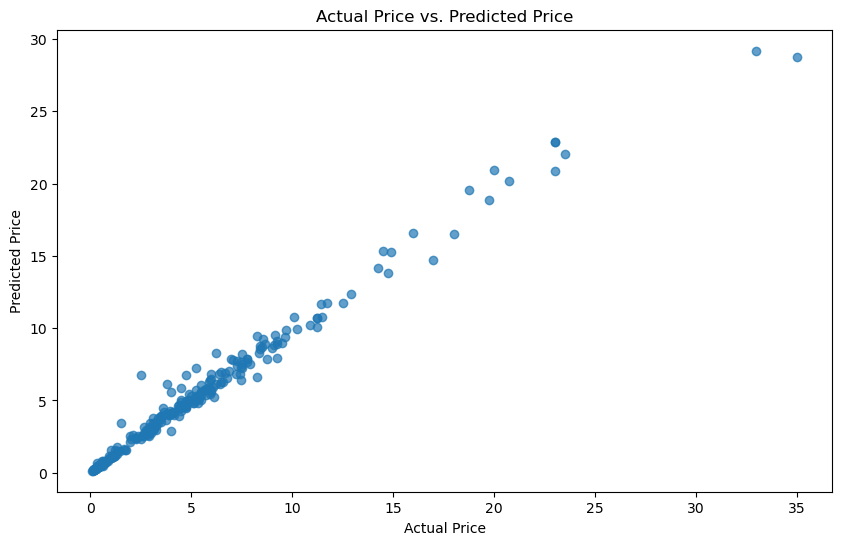

In [28]:
import matplotlib.pyplot as plt

# Make predictions on the entire dataset
all_predictions = model.predict(X)

results_df = pd.DataFrame({'Actual_Price': y, 'Predicted_Price': all_predictions})

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual_Price'], results_df['Predicted_Price'], alpha=0.7)
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
